## WeatherPy_Brucato

Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Analysis presented at the end of notebook.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

city_counter = 1
set_counter = 1
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")
print("-----------")

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        city_counter = 1
    query_url = url +"&q=" + city
    response = requests.get(query_url).json()
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    city_counter += 1
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found.")
        pass

print("-----------")
print("Completed")

Started
-----------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | sataua
City not found.
Processing Record 3 of Set 1 | nguiu
City not found.
Processing Record 4 of Set 1 | ankara
Processing Record 5 of Set 1 | brae
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kulhudhuffushi
Processing Record 16 of Set 1 | impfondo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mandalgovi
Processing Record 19 of Set 1 | alberton
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | san jose
Processing Record 22 of Set 1 | inuvik
Processing Record 23 of Set 1 | mar del plata
Processing Rec

Processing Record 43 of Set 1 | zenzeli
Processing Record 44 of Set 1 | mujiayingzi
Processing Record 45 of Set 1 | mount gambier
Processing Record 46 of Set 1 | monrovia
Processing Record 47 of Set 1 | tuktoyaktuk
Processing Record 48 of Set 1 | pevek
Processing Record 49 of Set 1 | pisco
Processing Record 50 of Set 1 | calamar
Processing Record 1 of Set 1 | charlestown
Processing Record 2 of Set 1 | riverton
Processing Record 3 of Set 1 | lisala
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | borogontsy
Processing Record 10 of Set 1 | mumford
Processing Record 11 of Set 1 | maceio
Processing Record 12 of Set 1 | kyren
Processing Record 13 of Set 1 | dianopolis
City not found.
Processing Record 14 of Set 1 | latung
Processing Record 15 of Set 1 | sao jose da coroa grande
Processing Record 16 of Set 1 | waingapu
Pro

Processing Record 37 of Set 1 | edson
Processing Record 38 of Set 1 | krasnoselkup
City not found.
Processing Record 39 of Set 1 | port lincoln
Processing Record 40 of Set 1 | agulu
Processing Record 41 of Set 1 | bonthe
Processing Record 42 of Set 1 | vila velha
Processing Record 43 of Set 1 | aleksandrov gay
Processing Record 44 of Set 1 | san patricio
Processing Record 45 of Set 1 | bani walid
Processing Record 46 of Set 1 | fairbanks
Processing Record 47 of Set 1 | okha
Processing Record 48 of Set 1 | tambopata
City not found.
Processing Record 49 of Set 1 | namibe
Processing Record 50 of Set 1 | marsabit
Processing Record 1 of Set 1 | bolshoy uluy
City not found.
Processing Record 2 of Set 1 | medicine hat
Processing Record 3 of Set 1 | alnashi
Processing Record 4 of Set 1 | yingzhong
City not found.
Processing Record 5 of Set 1 | bentiu
City not found.
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | moss point
Processing Record 8 of Set 1 | makokou
Process

Processing Record 29 of Set 1 | imbituba
Processing Record 30 of Set 1 | tanshui
City not found.
Processing Record 31 of Set 1 | half moon bay
Processing Record 32 of Set 1 | coari
Processing Record 33 of Set 1 | campeche
Processing Record 34 of Set 1 | yumbel
Processing Record 35 of Set 1 | nizhneyansk
City not found.
Processing Record 36 of Set 1 | batemans bay
Processing Record 37 of Set 1 | mitsamiouli
Processing Record 38 of Set 1 | naifaru
Processing Record 39 of Set 1 | thunder bay
Processing Record 40 of Set 1 | concepcion del oro
Processing Record 41 of Set 1 | arawa
Processing Record 42 of Set 1 | salisbury
Processing Record 43 of Set 1 | yerani
City not found.
Processing Record 44 of Set 1 | lagos
Processing Record 45 of Set 1 | karasjok
Processing Record 46 of Set 1 | grand-lahou
Processing Record 47 of Set 1 | puerto carreno
Processing Record 48 of Set 1 | kirkenaer
Processing Record 49 of Set 1 | port hawkesbury
Processing Record 50 of Set 1 | bousso
City not found.
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
# create dictionary 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create data frame and count variables for each column
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [5]:
weather_df.to_csv("cities_weather.csv", index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,40,NZ,1578412549,81,-46.19,168.86,46.00,3.00
1,Ankara,75,TR,1578412549,97,39.92,32.85,41.00,6.93
2,Brae,75,GB,1578412550,93,60.40,-1.35,50.00,32.21
3,Atuona,63,PF,1578412550,70,-9.80,-139.03,81.12,15.99
4,Kapaa,75,US,1578412550,83,22.08,-159.32,75.20,23.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

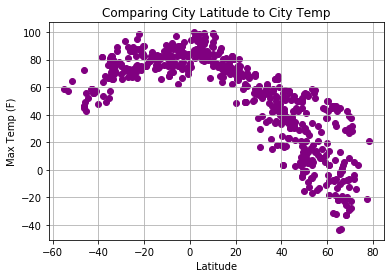

In [6]:
# create scatter plot for lat vs temp 
plt.title("Comparing City Latitude to City Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

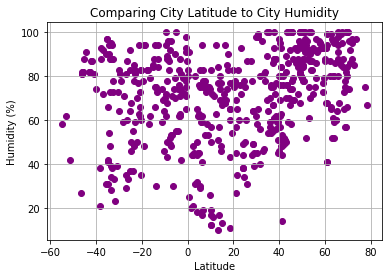

In [7]:
# create scatter plot for lat vs humidity 
plt.title("Comparing City Latitude to City Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

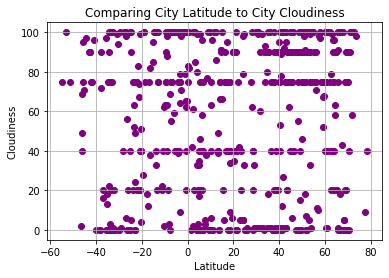

In [8]:
# create scatter plot for lat vs cloudiness 
plt.title("Comparing City Latitude to City Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

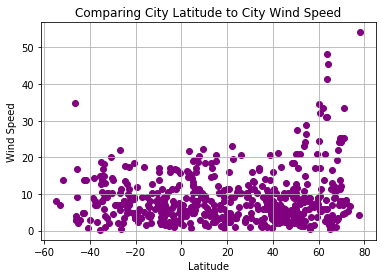

In [9]:
# create scatter plot for lat vs wind speed  
plt.title("Comparing City Latitude to City Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", color="purple")
plt.grid()
plt.savefig("lat_vs_wind.png")
plt.show()

## Analysis
* The first plot, comparing city latitude and city temp, shows that as cities get closer to the equator (latitude=0), the higher the city temp.  Subsequently, cities furthest from the equator showed lower max temps overall. 
* The second plot, comparing city latitude and city humidity, does not show an obvious correlation.  Regardless of city latitude, humidity levels tended to be scattered mostly between 40% - 100%.
* The last plot, comparing city latitude to city wind speed, shows that most wind speeds are 20 and lower, regardless of latitude.  Some of the data points may suggest that cities furthest from the equator have stronger wind speeds (~45) than those closest to the equator. 